In [49]:
import pylab as pl
import scipy as sp
import numpy as np
from scipy.io import loadmat
import pdb

In [50]:
def load_data(fname):
    # load the data
    data = loadmat(fname)
    # extract images and labels
    imgs = data['data_patterns']
    labels = data['data_labels']
    return imgs, labels

In [51]:
def perceptron_train(X,Y,Xtest,Ytest,iterations=100,eta=.01):
    # initialize accuracy vector
    acc = np.zeros(shape = (100,2))
    # initialize weight vector
    weights = np.zeros(shape = (256, ))
    # loop over iterations    
    for it in np.arange(iterations):
        # indices of misclassified data
        #wrong = np.where(np.sign(np.dot(X.T, weights)) != Y)
        wrong = np.where(np.sign(np.dot(weights, X)) != Y)
        # check if there is misclassified data
        print(wrong)
        
        if wrong[0].shape[0] > 0:
            # pick a random misclassified data point
            rit = np.random.choice(wrong[0])
            # update weight vector
            weights += eta*(X.T)[rit]*((Y.T)-(np.sign(np.dot(X.T, weights))).T)[rit]
            # compute error
            acc[it] = np.mean(np.sign(np.dot(Xtest.T, weights)) == Ytest)
           

    # return weight vector and error
    return weights,acc

(array([   0,    1,    2, ..., 1401, 1402, 1403], dtype=int64),)
(array([  12,   13,   20,   21,   25,   30,   42,   44,   45,   47,   48,
         53,   60,   67,   68,   69,   72,   73,   77,   78,   80,   83,
         86,   88,   90,   96,  102,  105,  120,  128,  133,  135,  139,
        145,  151,  152,  154,  158,  160,  165,  188,  190,  197,  201,
        206,  207,  210,  214,  225,  226,  230,  231,  234,  238,  240,
        243,  248,  250,  251,  253,  262,  265,  268,  279,  281,  286,
        288,  292,  296,  299,  301,  310,  314,  316,  317,  320,  334,
        341,  343,  346,  348,  352,  354,  358,  359,  362,  364,  369,
        372,  374,  377,  379,  383,  385,  387,  388,  390,  392,  397,
        398,  400,  403,  406,  408,  411,  412,  413,  418,  421,  428,
        440,  445,  447,  449,  454,  457,  464,  469,  472,  474,  486,
        487,  490,  491,  495,  497,  498,  499,  503,  508,  509,  521,
        524,  528,  531,  532,  537,  540,  544,  555,  55

C:\Users\beibi\AppData\Local\Temp\ipykernel_23312\204140537.py:41: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  weights = np.reshape(w,(int(np.sqrt(imgs.shape[0])),int(sp.sqrt(imgs.shape[0]))))


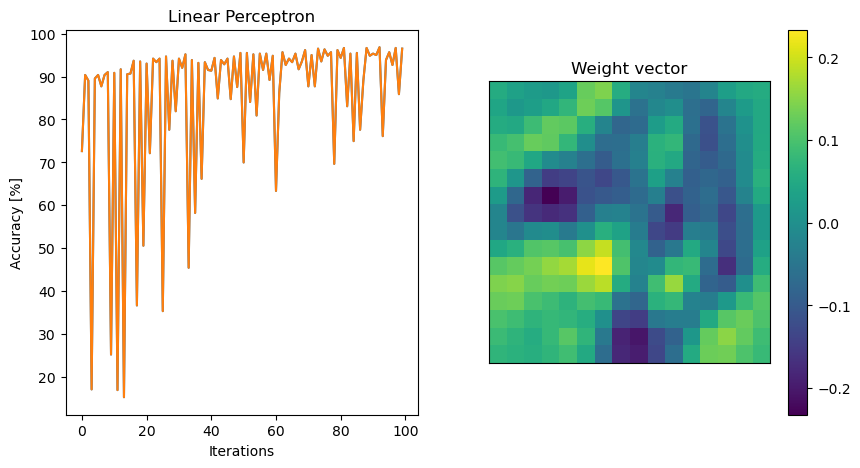

In [52]:
digit = 2
fname = "usps.mat"

imgs,labels = load_data(fname)
# we only want to classify one digit 
labels = np.sign((labels[digit,:]>0)-.5)

# please think about what the next lines do
permidx = np.random.permutation(np.arange(imgs.shape[-1]))
trainpercent = 70.
stopat = np.floor(labels.shape[-1]*trainpercent/100.)
stopat= int(stopat)

# cut segment data into train and test set into two non-overlapping sets:
X = imgs[:,:stopat]
Y = labels[:stopat]
Xtest = imgs[:, stopat:]
Ytest = labels[stopat:] 
#check that shapes of X and Y make sense..
# it might makes sense to print them
# weights = np.ones(shape = (256, ))
# wr = np.where(np.sign(np.dot(X.T, weights)) != Y)
# rit = np.random.choice(wr[0])
# # update weight vector
# weights += 0.1*(weights*(X.T)[rit]*(Y.T)[rit])
# print(weights)
# print()

w,acc_perceptron = perceptron_train(X,Y,Xtest,Ytest)

fig = pl.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(acc_perceptron*100.)
pl.xlabel('Iterations')
pl.title('Linear Perceptron')
pl.ylabel('Accuracy [%]')

# and imshow the weight vector
ax2 = fig.add_subplot(1,2,2)
# reshape weight vector
weights = np.reshape(w,(int(np.sqrt(imgs.shape[0])),int(sp.sqrt(imgs.shape[0]))))
# plot the weight image
imgh = ax2.imshow(weights)
# with colorbar
pl.colorbar(imgh)
ax2.set_title('Weight vector')
# remove axis ticks
pl.xticks(())
pl.yticks(())
# remove axis ticks
pl.xticks(())
pl.yticks(())

# write the picture to pdf
fname = 'Perceptron_digits-%d.pdf'%digit
pl.savefig(fname)

